#Importing Libraries

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report, balanced_accuracy_score,f1_score

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Acquiring Data

In [0]:
train=pd.read_csv("train .csv")
test=pd.read_csv("test.csv")

In [0]:
train_copy=train.copy()
test_copy=test.copy()

In [48]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [15]:
print(train.shape)
print("----------")
print(test.shape)

(891, 12)
----------
(418, 11)


In [16]:
print(train.isnull().sum())
print("-------------------")
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


There are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked values out of 891 in the train dataset.
There are 86 rows with missing Age and  327 rows with missing Cabin values of 418 in the train dataset.


In [0]:
train=train.drop("Cabin",axis=1)
test=test.drop("Cabin",axis=1)
#we drop the ticket attribute as well as it wont be useful in analysis or prediction
train=train.drop("Ticket",axis=1)
test=test.drop("Ticket",axis=1)
train=train.drop("PassengerId",axis=1)
test=test.drop("PassengerId",axis=1)

Survival : 0 = No, 1 = Yes
0    549
1    342
Name: Survived, dtype: int64


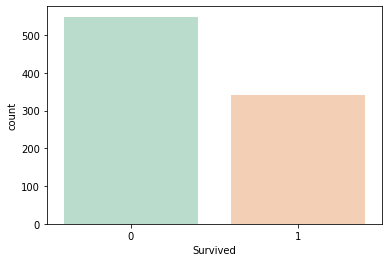

In [88]:
print("Survival : 0 = No, 1 = Yes")
print(train["Survived"].value_counts())
sns.countplot(x="Survived",data=train,palette='Pastel2')

In [19]:
train["Survived"].mean()

0.3838383838383838

This shows only38% of the passengers survived.


We have 5 categorical features 
*   Pclass 1 = 1st, 2 = 2nd, 3 = 3rd
*   SibSp  No. of siblings / spouses aboard the Titanic
*   Parch  No. of parents / children aboard the Titanic
*   Embarked  C = Cherbourg, Q = Queenstown, S = Southampton
*   Sex




In [0]:
def plotting(attribute):
  survived=train[train["Survived"]==1][attribute].value_counts()
  dead=train[train["Survived"]==0][attribute].value_counts()
  df=pd.DataFrame([survived,dead])
  df.index=["survived","dead"]
  df.plot(kind="bar",figsize=(10,5) , colormap='tab20')

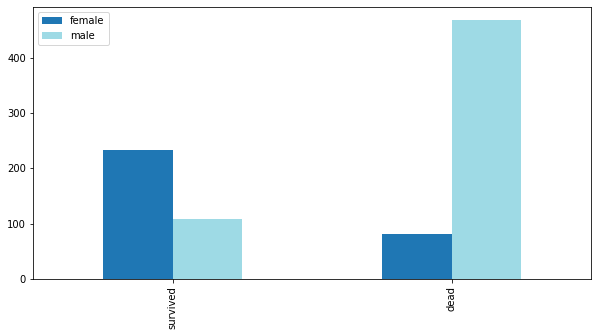

In [21]:
plotting("Sex")

This confirms Women and more likely to survive as compared to Men.

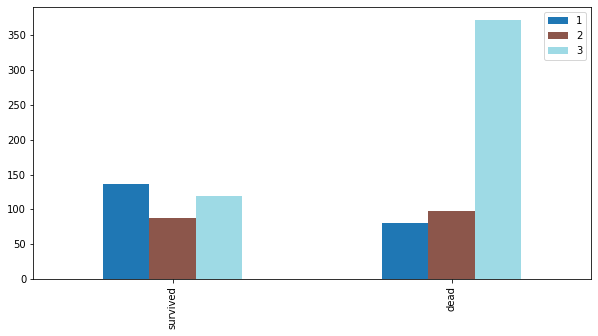

In [22]:
plotting("Pclass")

This confirms passengers of the 3rd class are more likely to die as compared to the other two classes and 1st class has a maximum probability of surviving.

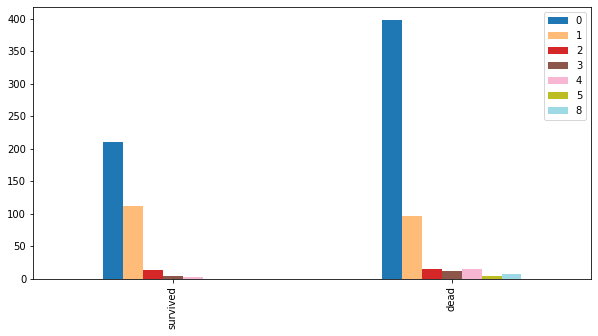

In [0]:
plotting("SibSp")

This confirms that a passenger with no sibling or spouse is more likely to be dead and a passenger with more than 2 sibling siblings or spouses has a higher chance to survive.

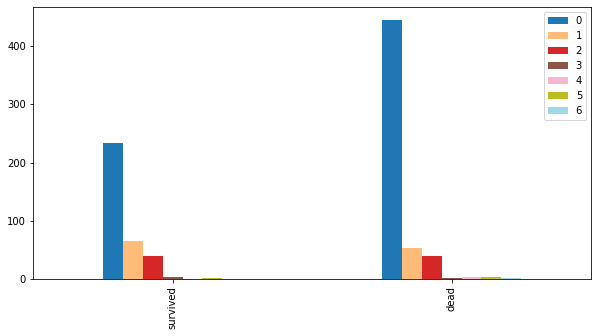

In [0]:
plotting("Parch")

*   A passenger with no parent or children is more likely to be dead.
*   A passenger with more than 2 parents and children is more likely to survive



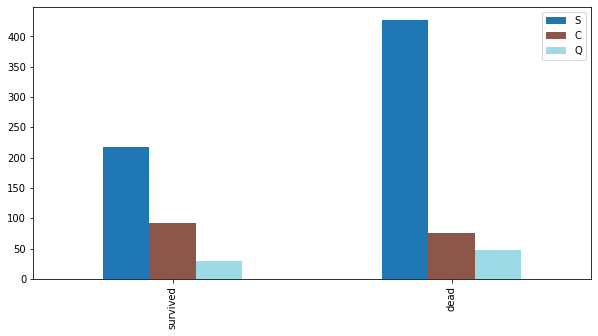

In [0]:
plotting("Embarked")

*   Maximum people who died had embarked from S(Southampton)

Age

Text(0.5, 1.0, 'Distrubution of passengers age')

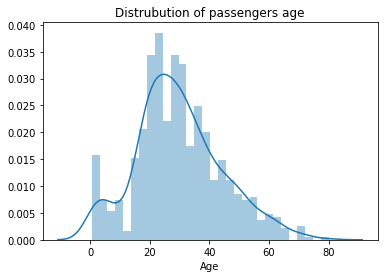

In [0]:
sns.distplot(train[(train["Age"] > 0)].Age, bins =30)
plt.title('Distrubution of passengers age')

The distribution of Age is slightly right skewed and there don't seem to be any obvious outliers

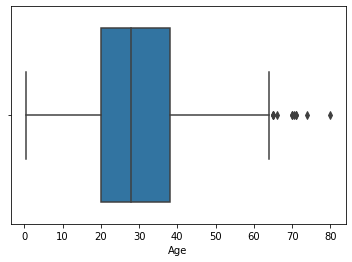

In [0]:
sns.boxplot(train[(train["Age"] > 0)].Age)

In [0]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Fare

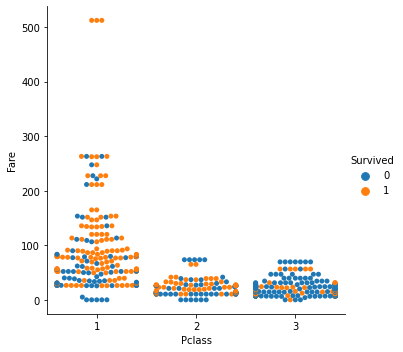

In [0]:
sns.catplot( x="Pclass",y="Fare",hue="Survived", kind="swarm", data=train)

More the passenger paid more were his chances of survival.       
We notice that there are two extreme fares 0 and greater than 500.

In [109]:
total=train.loc[(train["Fare"]==0) & (train["SibSp"]==0) & (train["Parch"]==0)].shape[0]
dead=train.loc[(train["Fare"]==0) & (train["SibSp"]==0) & (train["Parch"]==0) & (train["Survived"]==0)].shape[0]
death_prop=(dead/total)*100
death_prop

93.33333333333333

In [0]:
train.loc[train["Fare"]==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,0.0,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,0.0,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,S


we can make a column for the people who we assume worked at the titanic and hence did not survive as well.

# Feature Engineering

In [0]:
target=train[["Survived"]]

In [0]:
train=train.drop("Survived",axis=1)

In [0]:
combined=train.append(test)

Extracting Titles from the Name attribute

In [0]:
combined['Title'] = combined.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [168]:
combined["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Sir           1
Capt          1
Don           1
Jonkheer      1
Mme           1
Countess      1
Dona          1
Name: Title, dtype: int64

In [0]:
Title_Dictionary = {
    "Capt": "Other",
    "Col": "Other",
    "Major": "Other",
    "Jonkheer": "Other",
    "Don": "Mr",
    "Sir" : "Other",
    "Dr": "Other",
    "Rev": "Other",
    "Countess":"Other",
    "Mme": "Miss",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Other",
    "Dona" :"Mrs"
}

In [0]:
combined['Title'] = combined.Title.map(Title_Dictionary)

In [0]:
combined=combined.drop("Name",axis=1)

Imputing missing age values

In [172]:
combined.groupby(["Title"])["Age"].median()

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.5
Other     48.5
Name: Age, dtype: float64

In [138]:
combined.groupby(["Title"])["Age"].mean()

Title
Master     5.482642
Miss      21.805587
Mr        32.265464
Mrs       36.953488
Other     45.615385
Name: Age, dtype: float64

since mean and median values are almost similar we take the median value for imputing age.

In [0]:
combined["Age"]=combined["Age"].fillna(999)

In [0]:
combined.loc[(combined["Age"]==999) & (combined["Title"]=="Master") , "Age"]= 4
combined.loc[(combined["Age"]==999) & (combined["Title"]=="Miss") , "Age"]= 22
combined.loc[(combined["Age"]==999) & (combined["Title"]=="Mr") , "Age"]= 29
combined.loc[(combined["Age"]==999) & (combined["Title"]=="Mrs") , "Age"]= 35.5
combined.loc[(combined["Age"]==999) & (combined["Title"]=="Other") , "Age"]= 48.5

Imputing null values for Fare and Embarked

In [0]:
combined["Fare"]=combined.Fare.fillna(combined.Fare.mean())

In [74]:
combined.Embarked.mode()

0    S
dtype: object

In [0]:
combined["Embarked"]=combined.Embarked.fillna("S")

In [76]:
combined.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [0]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


Since we could interpret via the plotting that passengers with no parent and children and sibling or spouse and most likely to die , we can create an additional feature based on those two attributes.

In [0]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
combined['IsAlone'] = 1 
combined['IsAlone'].loc[combined['FamilySize'] > 1] = 0 

let us make a column for 0 fare passengers with no sibling spouse and no parent children.

In [0]:
combined["crew"]=0
combined["crew"].loc[(train["Fare"]==0) & (train["SibSp"]==0) & (train["Parch"]==0) ]=1

In [180]:
combined["Fare"].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [0]:
bins=[0,50,100,200,512]
labels=["low","lower_mid","higher_mid","high"]
combined['binned_fare'] = pd.cut(combined['Fare'], bins,labels=labels)

Dummy-Encoding the Categorical Features

In [0]:
combined=pd.get_dummies(combined,columns=["Pclass","Sex","Embarked","Title"])


In [0]:
combined=pd.get_dummies(combined,columns=["binned_fare"])

Recovering the train and test data

In [0]:
train = combined.iloc[:891]
test = combined.iloc[891:]

# Best Features

In [148]:
X=train
y=target
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs        Score
3         Fare  4518.319091
7   Sex_female   170.348127
14    Title_Mr   113.325148
8     Sex_male    92.702447
15   Title_Mrs    89.474177
13  Title_Miss    79.531749
4     Pclass_1    55.175151
6     Pclass_3    41.553071
0          Age    27.178068
9   Embarked_C    20.464401


# Feature Scaling

In [0]:
train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0,2
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1,0,2
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1,0,2
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,1,0,0,1


Since we see Age and Fare values are higher in magnitude as compared to the other features , we can scale them so the model doesn't assume they have higher weightthan other features.

In [0]:
transformer = MinMaxScaler()
train=transformer.fit_transform(train)
test=transformer.transform(test)

In [0]:
train

array([[0.27117366, 0.125     , 0.        , ..., 0.        , 0.        ,
        0.1       ],
       [0.4722292 , 0.125     , 0.        , ..., 1.        , 0.        ,
        0.1       ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27117366, 0.125     , 0.33333333, ..., 0.        , 0.        ,
        0.3       ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Modelling

In [0]:
X= train
y= target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

#*Logistic* *Regression*

In [0]:
logreg = LogisticRegression(solver='liblinear',penalty= 'l1',random_state =6)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,155,22
1,35,83


In [0]:
accuracy_score(y_test, y_pred)# how often the model is correct

0.8067796610169492

In [0]:
recall_score(y_test, y_pred)#how often the model predicts survived when its actually survived

0.7033898305084746

In [0]:
precision_score(y_test, y_pred)# how often the model predicts survived

0.7904761904761904

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84       177
           1       0.79      0.70      0.74       118

    accuracy                           0.81       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.81      0.81      0.80       295



In [0]:
logreg.fit(X,y)
y_hat = logreg.predict(test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#*Decision* *Tree*

In [0]:
dec_tree= DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=9,)
dec_tree= dec_tree.fit(X_train,y_train)
y_pred =dec_tree.predict(X_test)

In [190]:
accuracy_score(y_test, y_pred)

0.8033898305084746

In [191]:
confusion_matrix(y_test, y_pred)

array([[154,  23],
       [ 35,  83]])

In [0]:
dec_tree=dec_tree.fit(X,y)
y_hat=dec_tree.predict(test)

the results are similar to our logistic regression model.

# Random Forest

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
rf= RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random=rf_random.fit(X_train, y_train)
y_pred=rf_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.6min finished


In [0]:
accuracy_score(y_test, y_pred)

0.8135593220338984

In [0]:
confusion_matrix(y_test, y_pred)

array([[164,  13],
       [ 42,  76]])

In [0]:
rf_random=rf_random.fit(X, y)
y_hat=rf_random.predict(test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.1min finished


# Exporting csv

In [0]:
y_hat=pd.DataFrame(y_hat)
PassengerId=test_copy[["PassengerId"]]
y_hat= pd.concat([PassengerId,y_hat], axis=1)

In [0]:
y_hat.rename(columns = {0:'Survived'}, inplace = True)

In [0]:
export_csv=y_hat.to_csv('titanic_dectree1.csv', index=None,header=True)